In [ ]:
import os
HOME = os.getcwd()
print(HOME)

from roboflow import Roboflow
from IPython.display import Image
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="")

project = rf.workspace("qtiee").project("football-field-detection-f07vi-nyfp4")
version = project.version(1)
dataset = version.download("yolov8")
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

/workspace
mkdir: cannot create directory ‘/workspace/datasets’: File exists
/workspace/datasets


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to football-field-detection-1 in yolov8:: 100%|██████████| 643/643 [00:05<00:00, 116.54it/s]


## Custom training

In [8]:
MODEL_NAME="yolo26x-pose.yaml"
EPOCHS=100
BATCH_SIZE=16
IMAGE_SIZE=640

name = f"{MODEL_NAME}_{EPOCHS}_{IMAGE_SIZE}"
command = f"yolo train model={MODEL_NAME} data={dataset.location}/data.yaml batch={BATCH_SIZE} epochs={EPOCHS} imgsz={IMAGE_SIZE} name={name}"
print(command)

yolo train model=yolo26x-pose.yaml data=/workspace/datasets/football-field-detection-1/data.yaml batch=16 epochs=100 imgsz=640 name=yolo26x-pose.yaml_100_640


In [9]:
%cd {HOME}

!yolo task=pose mode=train model={MODEL_NAME} data={dataset.location}/data.yaml batch={BATCH_SIZE} epochs={EPOCHS} imgsz={IMAGE_SIZE} mosaic=0.0 plots=True name={name}

/workspace


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4090, 24091MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/datasets/football-field-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo26x-pose.yaml, momentum=0.937, mosaic=0.0, multi_scale=0.0, name=yolo26x-pose.yaml_100_640, nbs=64, nms=False, opset=None, optimi

/workspace


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


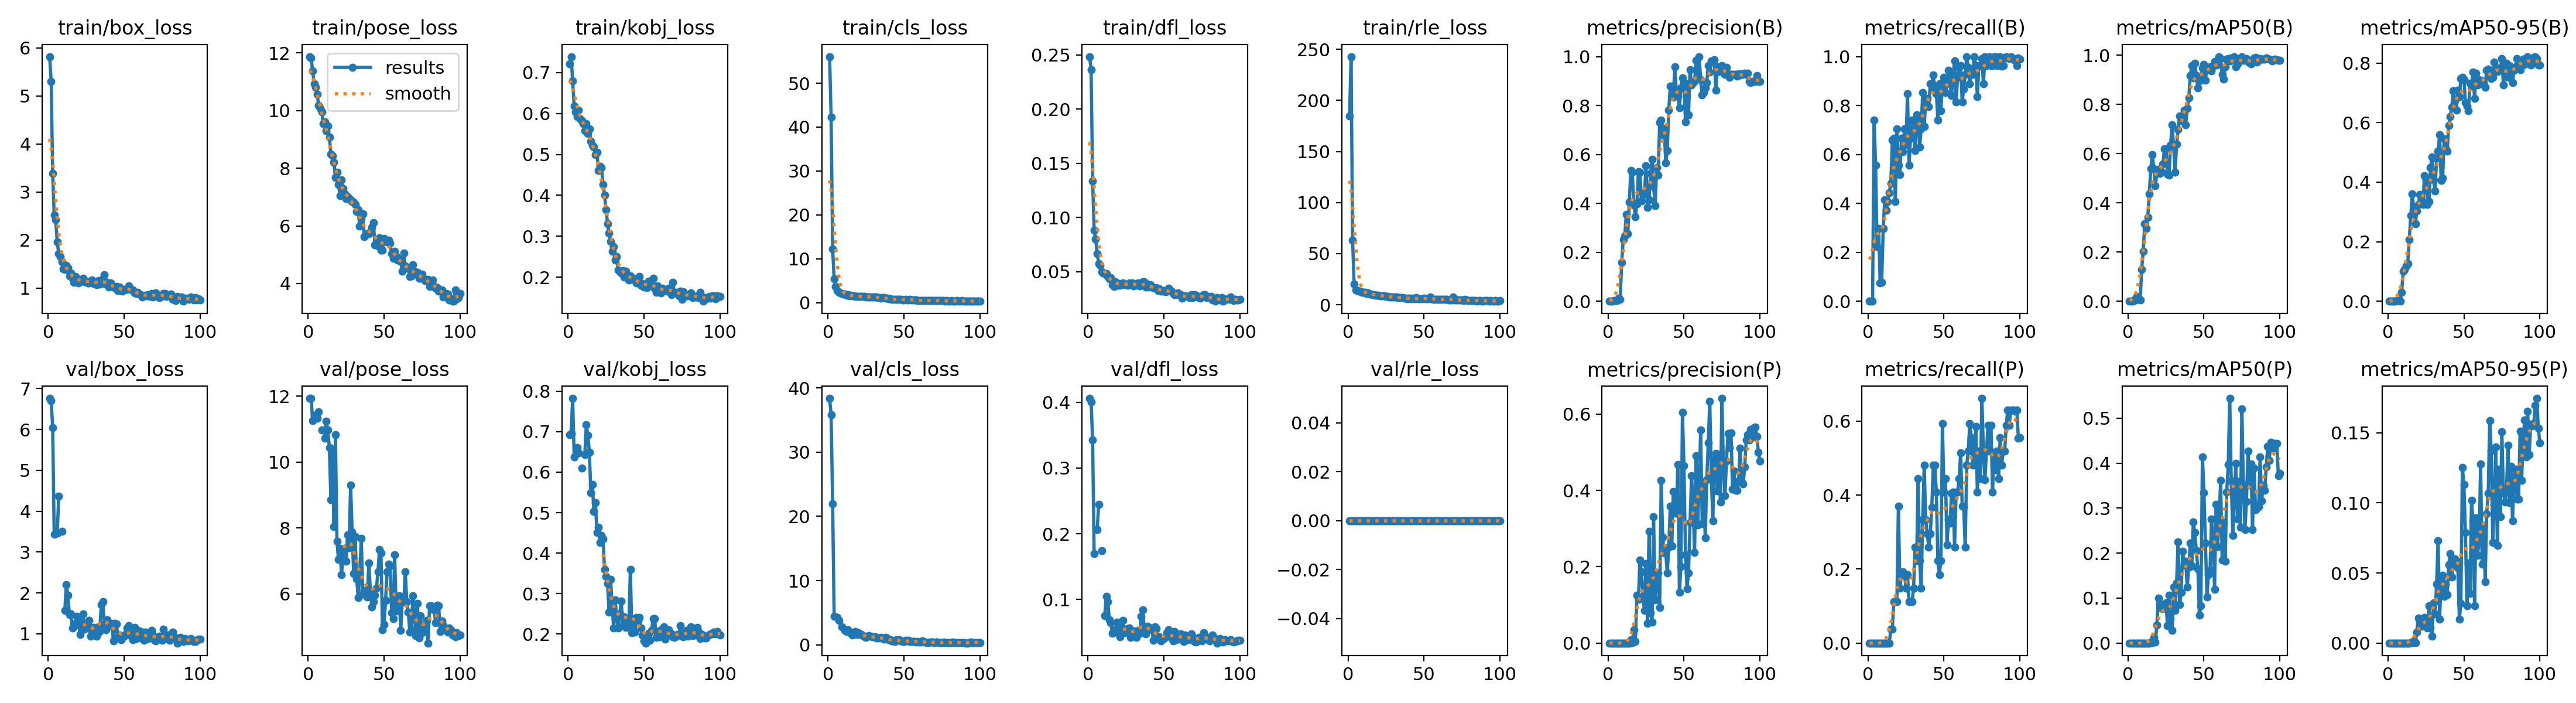

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/pose/{name}/results.png', width=600)

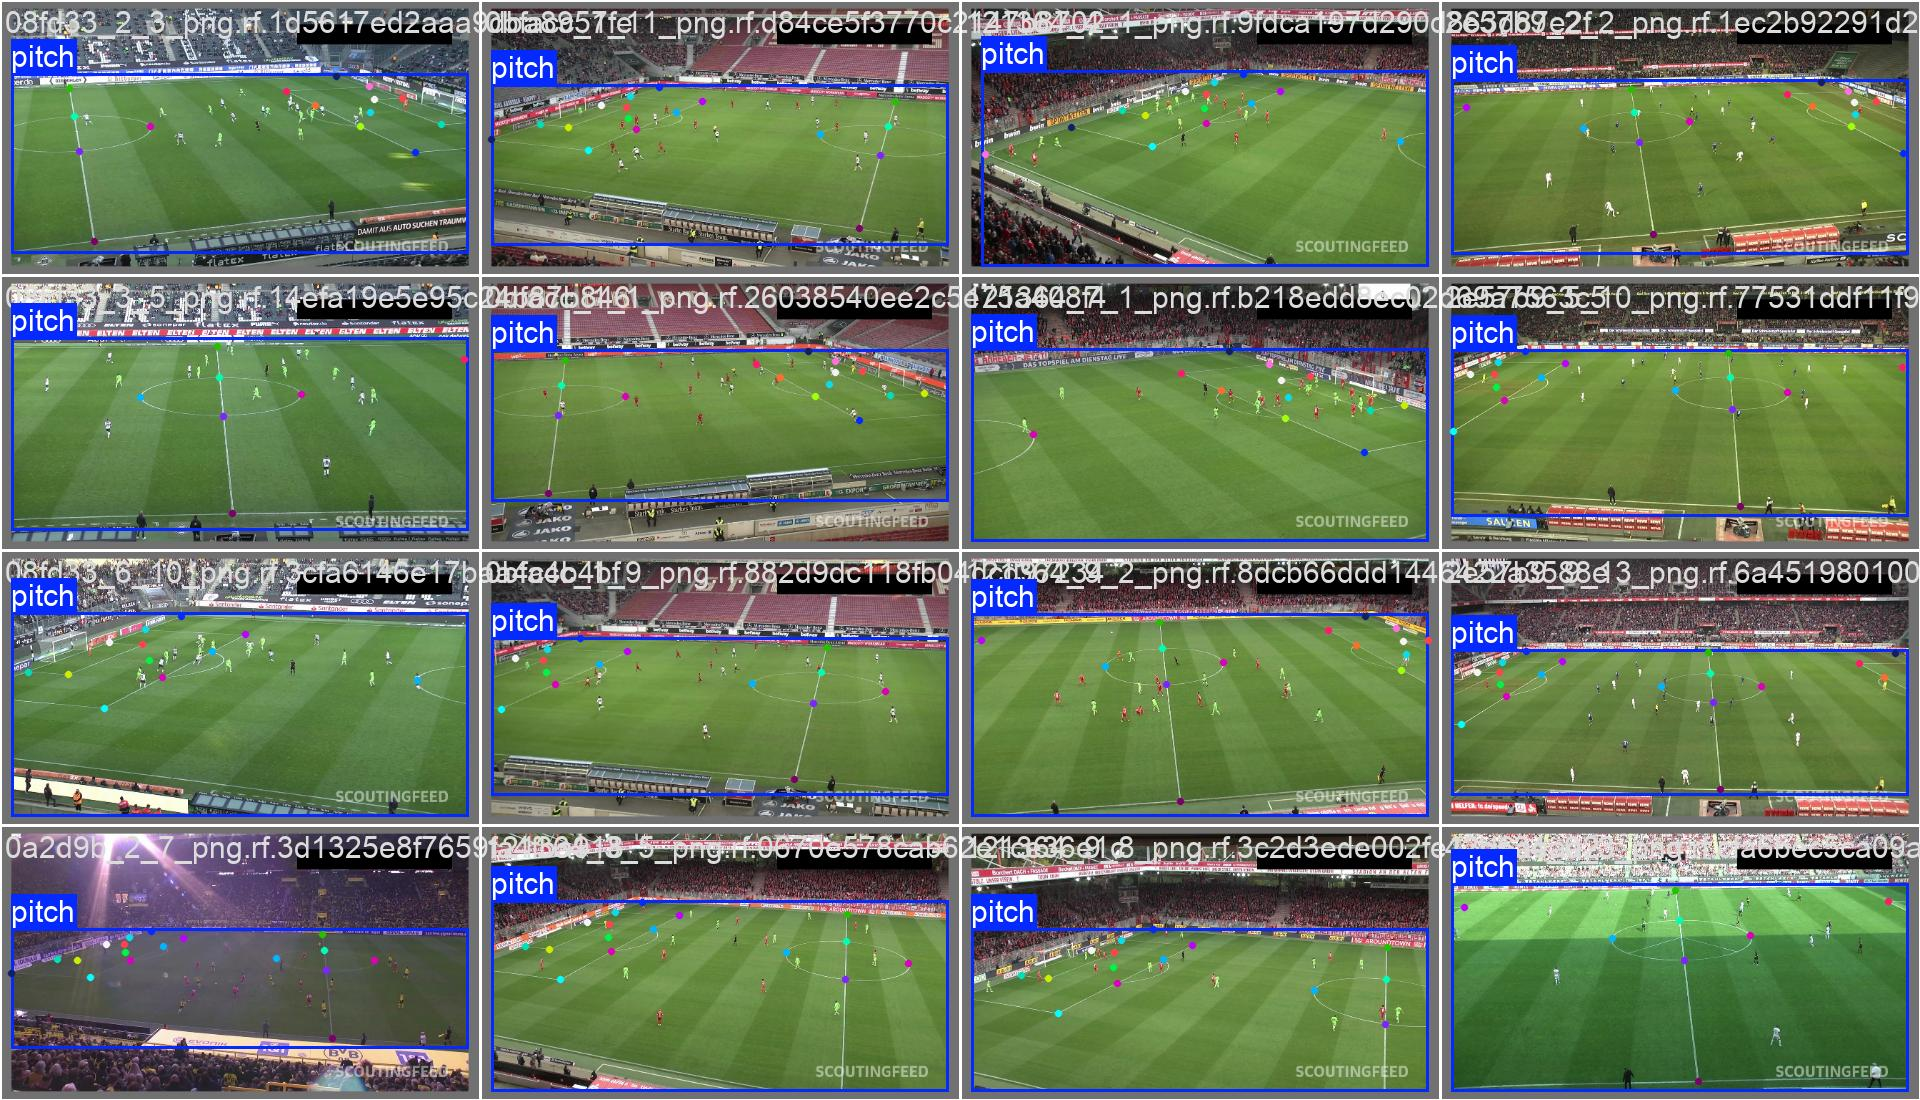

In [11]:
Image(filename=f'{HOME}/runs/pose/{name}/val_batch0_labels.jpg', width=600)

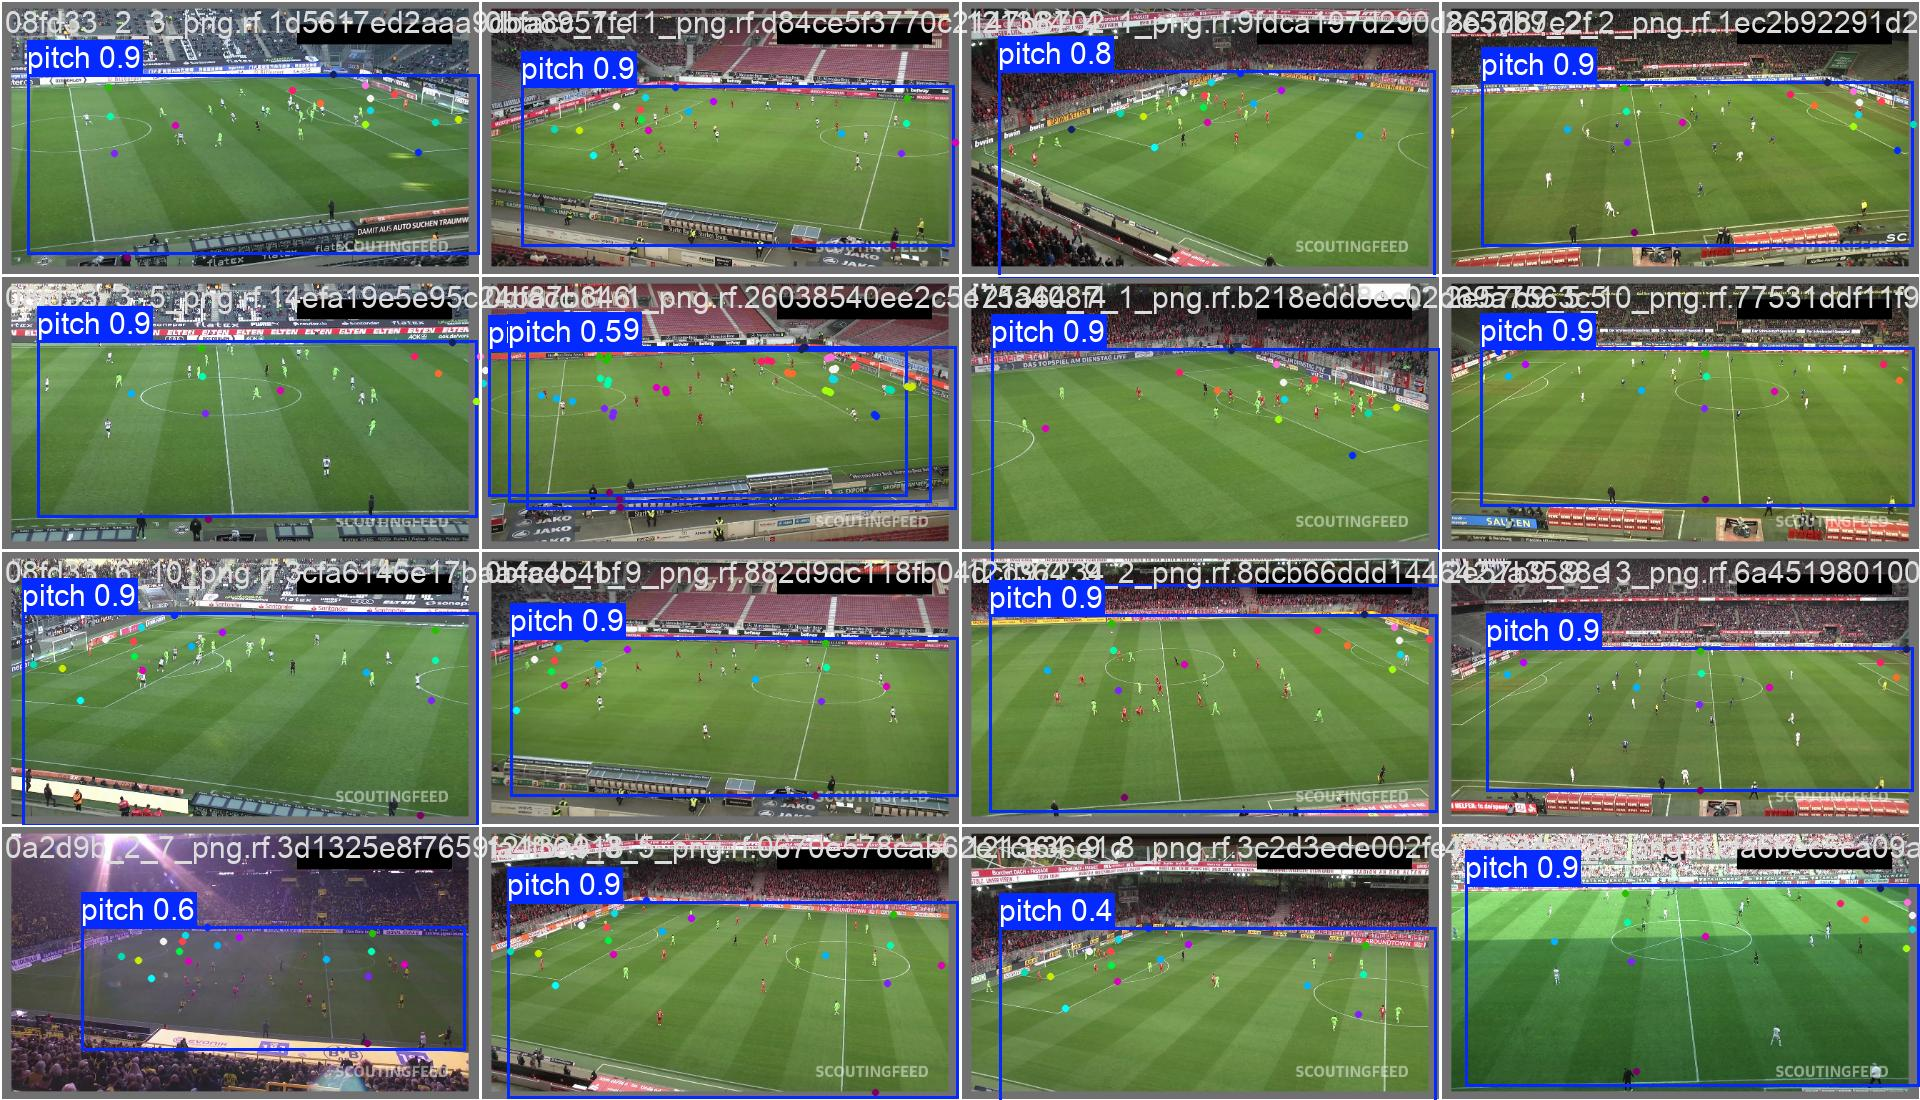

In [12]:
Image(filename=f'{HOME}/runs/pose/{name}/val_batch0_pred.jpg', width=600)

## Validate custom model

In [13]:
# !yolo task=pose mode=val model={HOME}/runs/pose/train/weights/best.pt data={dataset.location}/data.yaml